In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


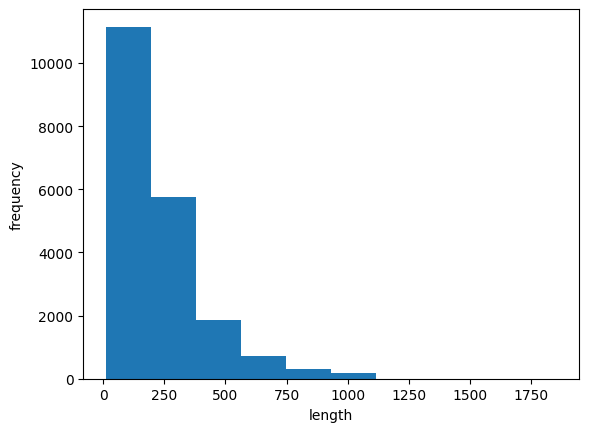

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [12]:
print(train_seq.shape)

(20000, 100)


In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
val_seq = pad_sequences(val_input, maxlen=100)

In [17]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
train_oh = keras.utils.to_categorical(train_seq)

In [19]:
print(train_oh.shape)

(20000, 100, 500)


In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [21]:
print(np.sum(train_oh[0][0]))

1.0


In [22]:
val_oh = keras.utils.to_categorical(val_seq)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model,h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb]) # 교재에서는 배치사이즈 64

Epoch 1/100
312/313 [============================>.] - ETA: 0s - loss: 0.6987 - accuracy: 0.5151

313/313 [==============================] - 25s 76ms/step - loss: 0.6986 - accuracy: 0.5153 - val_loss: 0.6903 - val_accuracy: 0.5356
Epoch 2/100
312/313 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5610

313/313 [==============================] - 20s 64ms/step - loss: 0.6833 - accuracy: 0.5611 - val_loss: 0.6791 - val_accuracy: 0.5786
Epoch 3/100
313/313 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.5945

313/313 [==============================] - 20s 63ms/step - loss: 0.6711 - accuracy: 0.5945 - val_loss: 0.6689 - val_accuracy: 0.5988
Epoch 4/100
313/313 [==============================] - ETA: 0s - loss: 0.6585 - accuracy: 0.6258

313/313 [==============================] - 19s 59ms/step - loss: 0.6585 - accuracy: 0.6258 - val_loss: 0.6561 - val_accuracy: 0.6260
Epoch 5/100
312/313 [============================>.] - ETA: 0s - loss: 0.6420 - accuracy: 0.6546

313/313 [==============================] - 17s 55ms/step - loss: 0.6420 - accuracy: 0.6545 - val_loss: 0.6379 - val_accuracy: 0.6550
Epoch 6/100
313/313 [==============================] - ETA: 0s - loss: 0.6238 - accuracy: 0.6807

313/313 [==============================] - 19s 60ms/step - loss: 0.6238 - accuracy: 0.6807 - val_loss: 0.6257 - val_accuracy: 0.6704
Epoch 7/100
312/313 [============================>.] - ETA: 0s - loss: 0.6083 - accuracy: 0.7002

313/313 [==============================] - 20s 64ms/step - loss: 0.6083 - accuracy: 0.7000 - val_loss: 0.6110 - val_accuracy: 0.6884
Epoch 8/100
312/313 [============================>.] - ETA: 0s - loss: 0.5927 - accuracy: 0.7154

313/313 [==============================] - 18s 59ms/step - loss: 0.5927 - accuracy: 0.7153 - val_loss: 0.5957 - val_accuracy: 0.7074
Epoch 9/100
313/313 [==============================] - ETA: 0s - loss: 0.5776 - accuracy: 0.7306

313/313 [==============================] - 18s 58ms/step - loss: 0.5776 - accuracy: 0.7306 - val_loss: 0.5824 - val_accuracy: 0.7152
Epoch 10/100
313/313 [==============================] - ETA: 0s - loss: 0.5636 - accuracy: 0.7395

313/313 [==============================] - 19s 60ms/step - loss: 0.5636 - accuracy: 0.7395 - val_loss: 0.5698 - val_accuracy: 0.7278
Epoch 11/100
313/313 [==============================] - ETA: 0s - loss: 0.5503 - accuracy: 0.7492

313/313 [==============================] - 19s 61ms/step - loss: 0.5503 - accuracy: 0.7492 - val_loss: 0.5567 - val_accuracy: 0.7402
Epoch 12/100
312/313 [============================>.] - ETA: 0s - loss: 0.5380 - accuracy: 0.7581

313/313 [==============================] - 19s 61ms/step - loss: 0.5379 - accuracy: 0.7581 - val_loss: 0.5466 - val_accuracy: 0.7460
Epoch 13/100
312/313 [============================>.] - ETA: 0s - loss: 0.5262 - accuracy: 0.7656

313/313 [==============================] - 19s 60ms/step - loss: 0.5261 - accuracy: 0.7657 - val_loss: 0.5363 - val_accuracy: 0.7536
Epoch 14/100
312/313 [============================>.] - ETA: 0s - loss: 0.5153 - accuracy: 0.7712

313/313 [==============================] - 19s 60ms/step - loss: 0.5153 - accuracy: 0.7714 - val_loss: 0.5257 - val_accuracy: 0.7600
Epoch 15/100
312/313 [============================>.] - ETA: 0s - loss: 0.5058 - accuracy: 0.7776

313/313 [==============================] - 19s 60ms/step - loss: 0.5057 - accuracy: 0.7778 - val_loss: 0.5178 - val_accuracy: 0.7616
Epoch 16/100
312/313 [============================>.] - ETA: 0s - loss: 0.4969 - accuracy: 0.7837

313/313 [==============================] - 18s 58ms/step - loss: 0.4967 - accuracy: 0.7839 - val_loss: 0.5108 - val_accuracy: 0.7682
Epoch 17/100
313/313 [==============================] - ETA: 0s - loss: 0.4879 - accuracy: 0.7861

313/313 [==============================] - 20s 63ms/step - loss: 0.4879 - accuracy: 0.7861 - val_loss: 0.5047 - val_accuracy: 0.7674
Epoch 18/100
313/313 [==============================] - ETA: 0s - loss: 0.4807 - accuracy: 0.7908

313/313 [==============================] - 19s 61ms/step - loss: 0.4807 - accuracy: 0.7908 - val_loss: 0.4995 - val_accuracy: 0.7702
Epoch 19/100
312/313 [============================>.] - ETA: 0s - loss: 0.4744 - accuracy: 0.7930

313/313 [==============================] - 18s 57ms/step - loss: 0.4742 - accuracy: 0.7933 - val_loss: 0.4950 - val_accuracy: 0.7768
Epoch 20/100
313/313 [==============================] - 17s 56ms/step - loss: 0.4681 - accuracy: 0.7969 - val_loss: 0.4952 - val_accuracy: 0.7708
Epoch 21/100
313/313 [==============================] - ETA: 0s - loss: 0.4634 - accuracy: 0.7977

313/313 [==============================] - 20s 64ms/step - loss: 0.4634 - accuracy: 0.7977 - val_loss: 0.4881 - val_accuracy: 0.7736
Epoch 22/100
312/313 [============================>.] - ETA: 0s - loss: 0.4583 - accuracy: 0.7998

313/313 [==============================] - 19s 61ms/step - loss: 0.4583 - accuracy: 0.7997 - val_loss: 0.4857 - val_accuracy: 0.7738
Epoch 23/100
313/313 [==============================] - ETA: 0s - loss: 0.4537 - accuracy: 0.8031

313/313 [==============================] - 18s 58ms/step - loss: 0.4537 - accuracy: 0.8031 - val_loss: 0.4833 - val_accuracy: 0.7766
Epoch 24/100
313/313 [==============================] - ETA: 0s - loss: 0.4495 - accuracy: 0.8049

313/313 [==============================] - 18s 58ms/step - loss: 0.4495 - accuracy: 0.8049 - val_loss: 0.4812 - val_accuracy: 0.7762
Epoch 25/100
312/313 [============================>.] - ETA: 0s - loss: 0.4459 - accuracy: 0.8064

313/313 [==============================] - 17s 54ms/step - loss: 0.4458 - accuracy: 0.8064 - val_loss: 0.4795 - val_accuracy: 0.7780
Epoch 26/100
313/313 [==============================] - ETA: 0s - loss: 0.4427 - accuracy: 0.8076

313/313 [==============================] - 17s 55ms/step - loss: 0.4427 - accuracy: 0.8076 - val_loss: 0.4749 - val_accuracy: 0.7832
Epoch 27/100
313/313 [==============================] - 16s 51ms/step - loss: 0.4392 - accuracy: 0.8086 - val_loss: 0.4793 - val_accuracy: 0.7764
Epoch 28/100
313/313 [==============================] - 15s 48ms/step - loss: 0.4367 - accuracy: 0.8097 - val_loss: 0.4773 - val_accuracy: 0.7788
Epoch 29/100
313/313 [==============================] - ETA: 0s - loss: 0.4337 - accuracy: 0.8099

313/313 [==============================] - 18s 58ms/step - loss: 0.4337 - accuracy: 0.8099 - val_loss: 0.4726 - val_accuracy: 0.7816
Epoch 30/100
312/313 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.8111

313/313 [==============================] - 18s 59ms/step - loss: 0.4317 - accuracy: 0.8111 - val_loss: 0.4694 - val_accuracy: 0.7828
Epoch 31/100
313/313 [==============================] - ETA: 0s - loss: 0.4293 - accuracy: 0.8117

313/313 [==============================] - 18s 57ms/step - loss: 0.4293 - accuracy: 0.8117 - val_loss: 0.4676 - val_accuracy: 0.7816
Epoch 32/100
313/313 [==============================] - 14s 45ms/step - loss: 0.4269 - accuracy: 0.8141 - val_loss: 0.4693 - val_accuracy: 0.7848
Epoch 33/100
313/313 [==============================] - 15s 47ms/step - loss: 0.4255 - accuracy: 0.8152 - val_loss: 0.4700 - val_accuracy: 0.7818
Epoch 34/100
313/313 [==============================] - ETA: 0s - loss: 0.4236 - accuracy: 0.8145

313/313 [==============================] - 17s 54ms/step - loss: 0.4236 - accuracy: 0.8145 - val_loss: 0.4672 - val_accuracy: 0.7842
Epoch 35/100
313/313 [==============================] - ETA: 0s - loss: 0.4216 - accuracy: 0.8178

313/313 [==============================] - 17s 53ms/step - loss: 0.4216 - accuracy: 0.8178 - val_loss: 0.4669 - val_accuracy: 0.7844
Epoch 36/100
312/313 [============================>.] - ETA: 0s - loss: 0.4200 - accuracy: 0.8165

313/313 [==============================] - 19s 60ms/step - loss: 0.4198 - accuracy: 0.8166 - val_loss: 0.4653 - val_accuracy: 0.7838
Epoch 37/100
313/313 [==============================] - 14s 44ms/step - loss: 0.4183 - accuracy: 0.8169 - val_loss: 0.4658 - val_accuracy: 0.7820
Epoch 38/100
313/313 [==============================] - 16s 50ms/step - loss: 0.4167 - accuracy: 0.8188 - val_loss: 0.4665 - val_accuracy: 0.7820
Epoch 39/100
313/313 [==============================] - 16s 51ms/step - loss: 0.4153 - accuracy: 0.8189 - val_loss: 0.4689 - val_accuracy: 0.7848


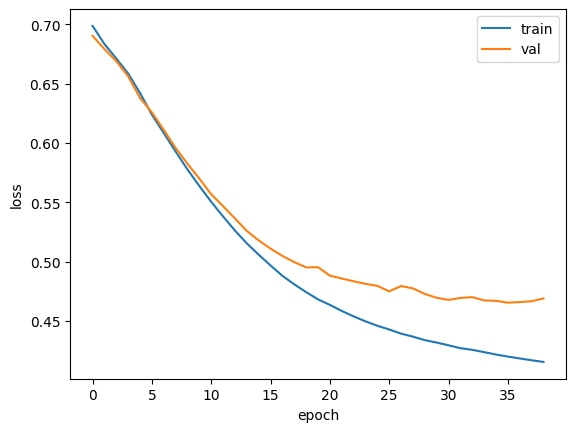

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [27]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 35ms/step - loss: 0.6949 - accuracy: 0.5051 - val_loss: 0.6947 - val_accuracy: 0.5102
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6897 - accuracy: 0.5323 - val_loss: 0.6920 - val_accuracy: 0.5294
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6854 - accuracy: 0.5525 - val_loss: 0.6900 - val_accuracy: 0.5344
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6809 - accuracy: 0.5676 - val_loss: 0.6885 - val_accuracy: 0.5388
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6764 - accuracy: 0.5829 - val_loss: 0.6872 - val_accuracy: 0.5380
Epoch 6/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6718 - accuracy: 0.5932 - val_loss: 0.6858 - val_accuracy: 0.5436
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6670 - accuracy: 0.5990 - val_loss: 0.6844 - val_accur

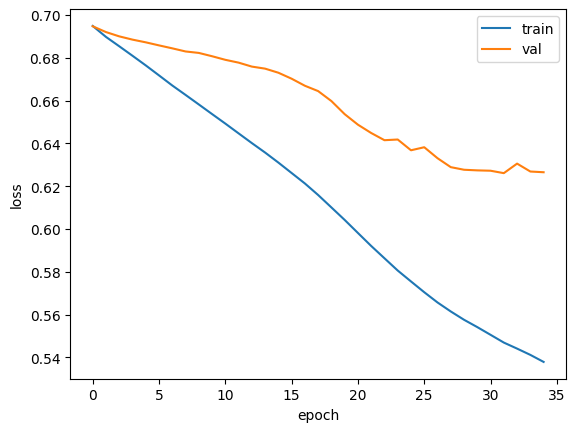

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()